In [4]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('HeartDisease.csv')
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

([<matplotlib.patches.Wedge at 0x28c3612dc50>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'Yes'),
  Text(0.16741857967099594, -1.1882638676577466, 'No')],
 [Text(-0.08370923420885121, 0.5941319416663, '54.5%'),
  Text(0.0976608381414143, -0.693153922800352, '45.5%')])

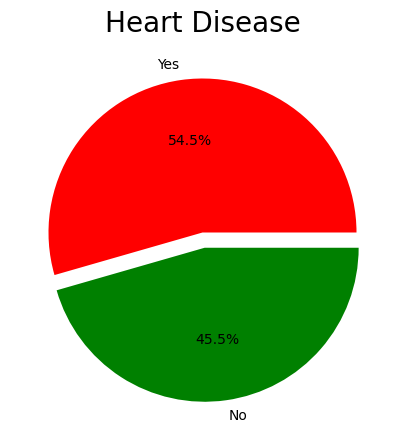

In [9]:
plt.figure(figsize=(10,5))
sizes=data['target'].value_counts().values
labels=['Yes','No']
colors=['Red','Green']
explode=[0, .1]

plt.title("Heart Disease",size=20)
plt.pie(sizes,explode,labels,colors,autopct='%1.1f%%')

*Above graph shows that 54.5% of total population is suffering from heart disease.*

In [10]:
data.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x28c361d7f90>,
 [Text(-0.5986245291714798, 0.9228481310997082, 'Male'),
  Text(0.6530448466562175, -1.006743476887612, 'Female')],
 [Text(-0.32652247045717075, 0.503371707872568, '68.3%'),
  Text(0.3809428272161268, -0.5872670281844402, '31.7%')])

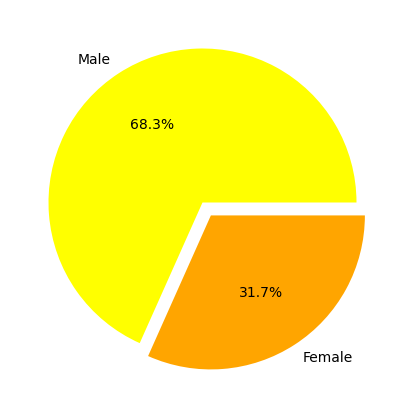

In [11]:
plt.figure(figsize=(10,5))
labels = ['Male', 'Female']
explode = [0, .1]
myColors = ['yellow','orange']
size = data.gender.value_counts()
plt.pie(size, labels=labels, explode=explode, colors = myColors, autopct='%1.1f%%')

<Axes: xlabel='slope', ylabel='count'>

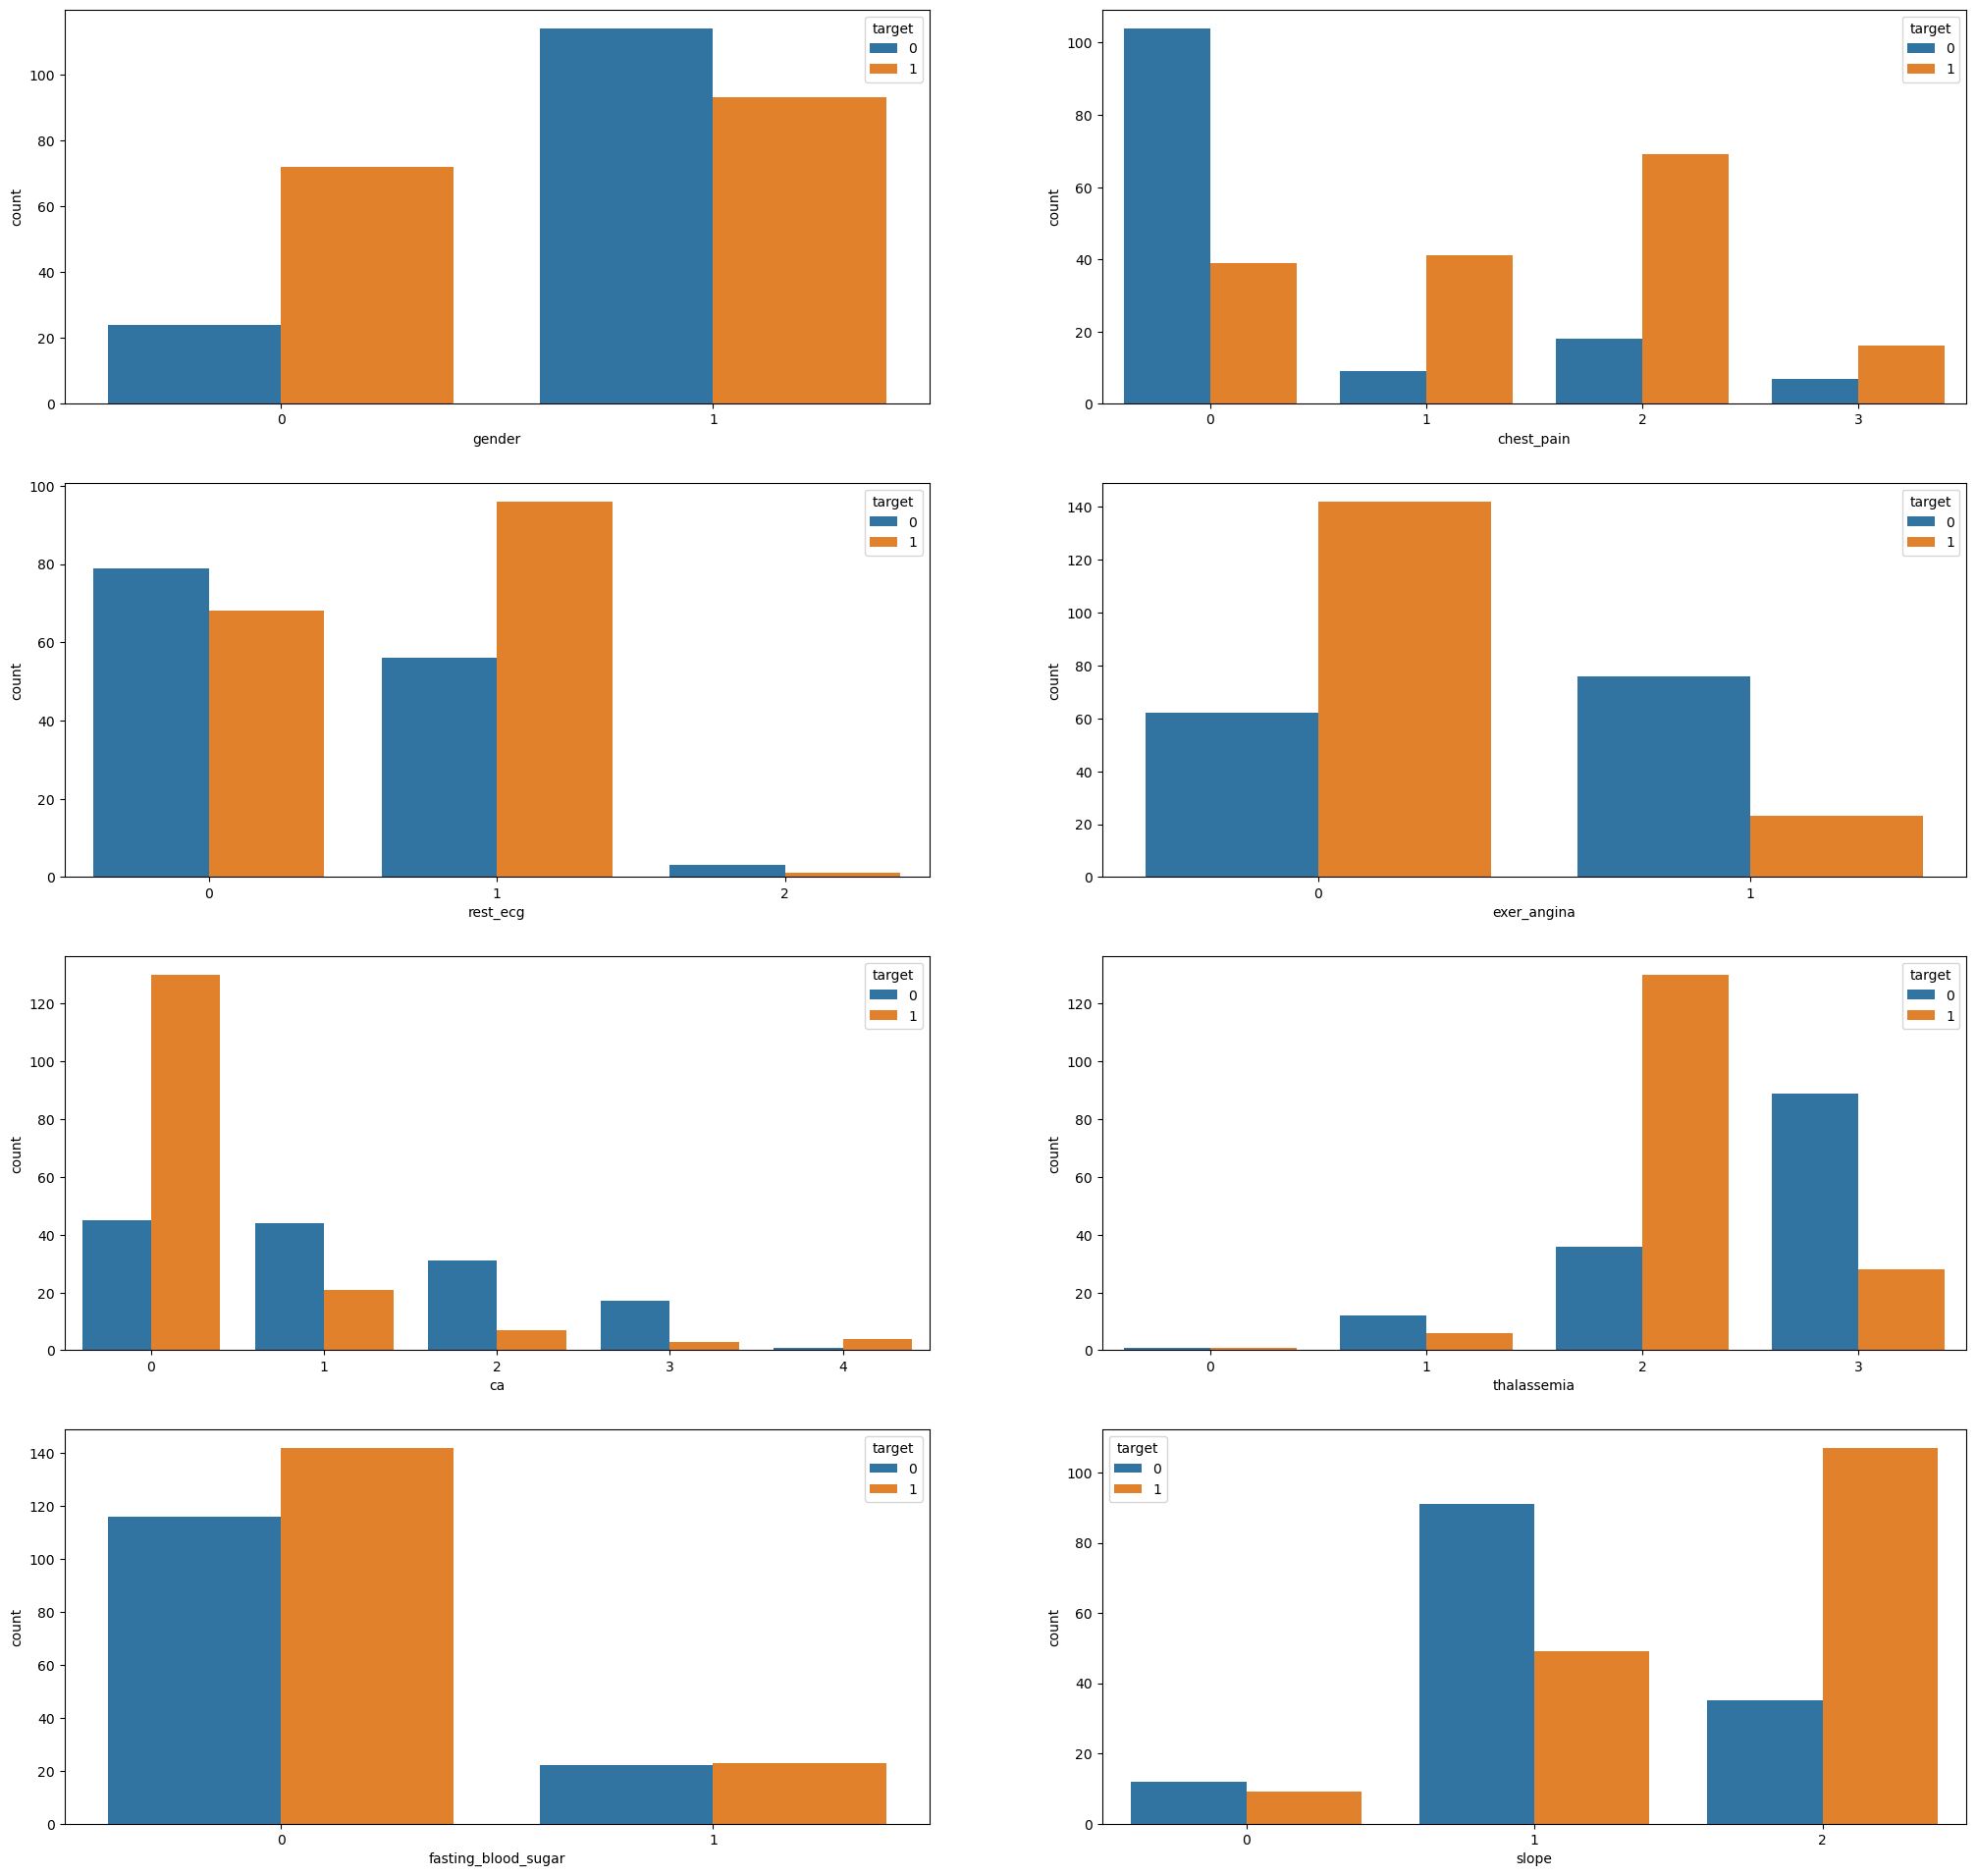

In [12]:
# checking for heart disease based on categorical data
fig, ax = plt.subplots(4,2, figsize=(25,24)) 

sns.countplot(x="gender", hue='target', data=data, ax=ax[0][0])
sns.countplot(x="chest_pain", hue='target', data=data, ax=ax[0][1])

sns.countplot(x="rest_ecg", hue='target', data=data, ax=ax[1][0])
sns.countplot(x="exer_angina", hue='target', data=data, ax=ax[1][1])

sns.countplot(x="ca", hue='target', data=data, ax=ax[2][0])
sns.countplot(x="thalassemia", hue='target', data=data, ax=ax[2][1])

sns.countplot(x="fasting_blood_sugar", hue='target', data=data, ax=ax[3][0])
sns.countplot(x="slope", hue='target', data=data, ax=ax[3][1])

*The bar chart shows the count of people with different fasting blood sugar levels.
The highest count is for people with fasting blood sugar levels between 80 and 100 mg/dL.
The lowest count is for people with fasting blood sugar levels above 140 mg/dL.
The majority of people have fasting blood sugar levels within the normal range (70-130 mg/dL).*

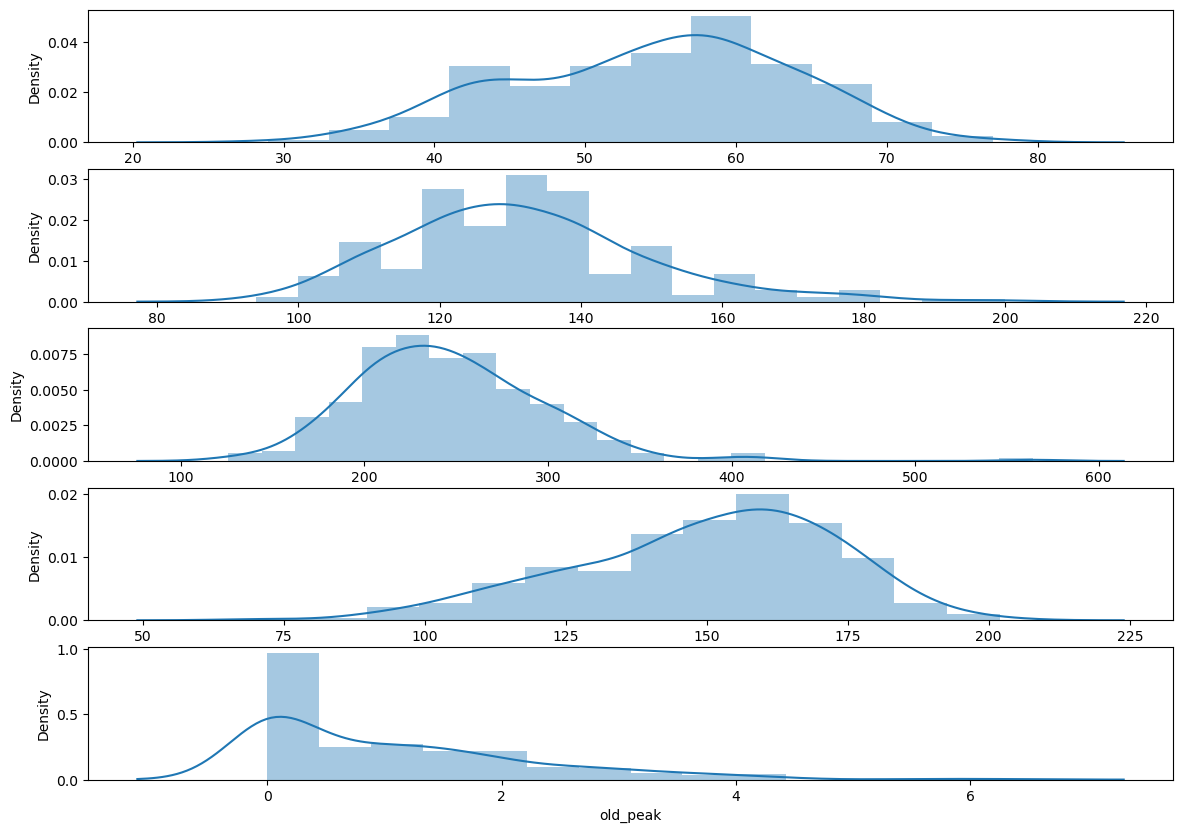

In [13]:
fig,axs=plt.subplots(5,1,figsize=(14,10))
plt1=sns.distplot(data['age'],ax=axs[0])
plt2=sns.distplot(data['rest_bps'],ax=axs[1])
plt3=sns.distplot(data['cholestrol'],ax=axs[2])
plt4=sns.distplot(data['thalach'],ax=axs[3])
plt5=sns.distplot(data['old_peak'],ax=axs[4])


plt.show()

*The first plot suggests that the variable is normally distributed in the population. This means that the majority of people have values that are close to the mean.
The second plot suggests that the variable is skewed in the population. This means that more people have values on one side of the distribution than the other.
The third plot suggests that the variable is bimodal in the population. This means that there are two groups of people with different values for the variable.
The fourth plot suggests that the variable is uniformly distributed in the population. This means that all values for the variable are equally likely.*

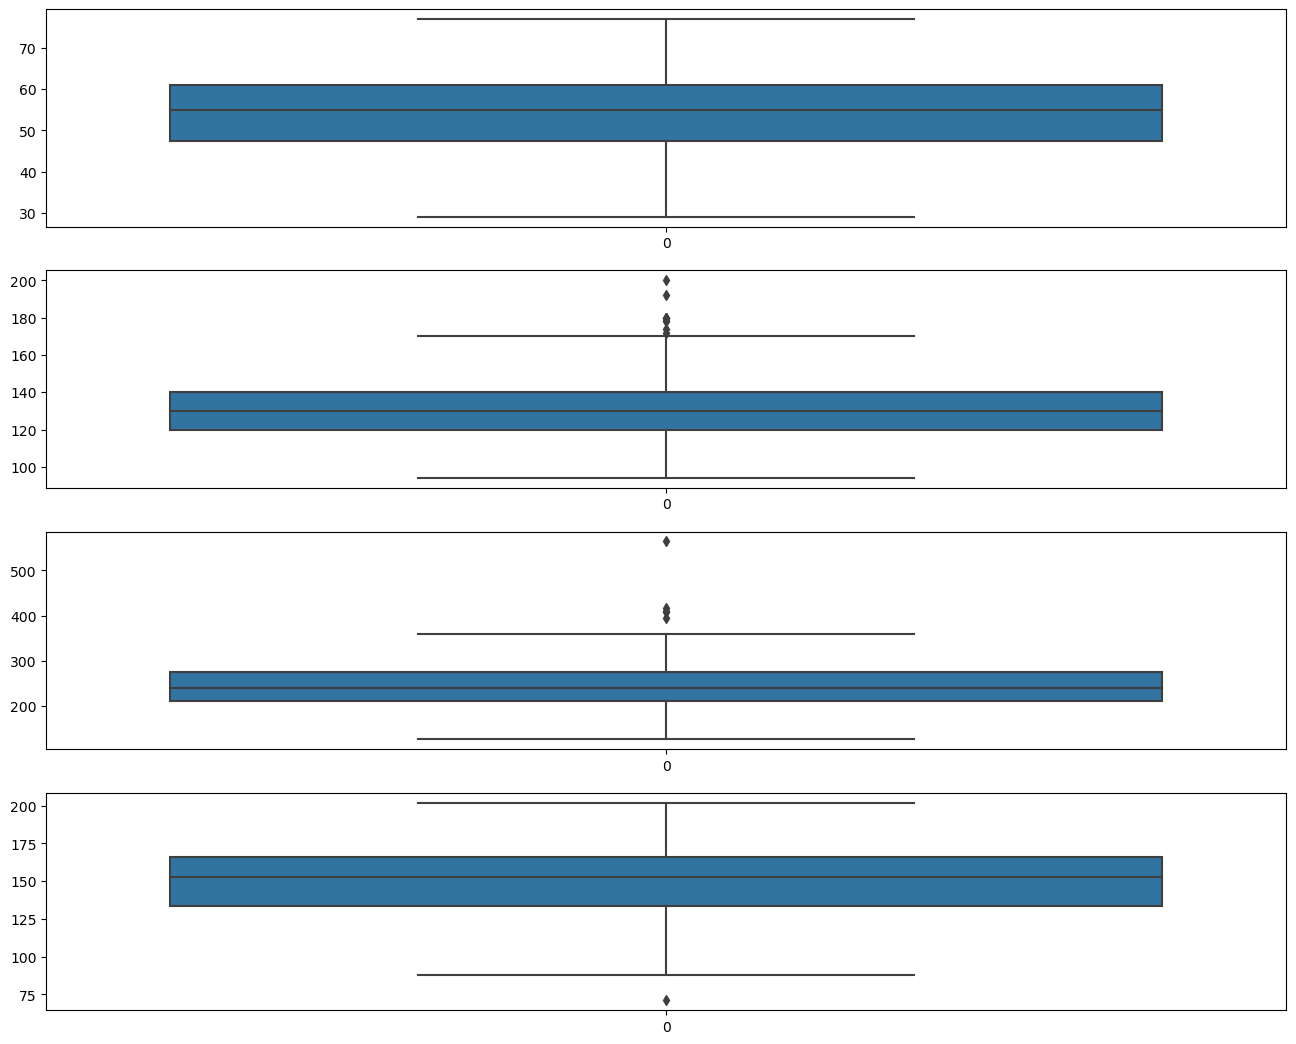

In [15]:
# Outliers
fig, axs = plt.subplots(4,1,figsize=(16,13))

plt1=sns.boxplot(data['age'], ax=axs[0])
plt2=sns.boxplot(data['rest_bps'], ax=axs[1])
plt3=sns.boxplot(data['cholestrol'], ax=axs[2])
plt4=sns.boxplot(data['thalach'], ax=axs[3])

plt.show()

In [16]:
from sklearn.feature_selection import chi2

In [17]:
x1 = data[['gender', 'chest_pain', 'rest_ecg', 'exer_angina', 'ca','thalassemia','fasting_blood_sugar','slope']]
y1 = data.target

In [18]:
# returns f score and p value
f_score = chi2(x1, y1)
f_score

(array([ 7.57683451, 62.59809791,  2.97827075, 38.91437697, 66.44076512,
         5.79185297,  0.20293368,  9.8040952 ]),
 array([5.91231763e-03, 2.53498179e-15, 8.43893904e-02, 4.42807388e-10,
        3.60567663e-16, 1.61006098e-02, 6.52363208e-01, 1.74123685e-03]))

In [19]:
p_value = pd.Series(f_score[1], index=x1.columns)
p_value

gender                 5.912318e-03
chest_pain             2.534982e-15
rest_ecg               8.438939e-02
exer_angina            4.428074e-10
ca                     3.605677e-16
thalassemia            1.610061e-02
fasting_blood_sugar    6.523632e-01
slope                  1.741237e-03
dtype: float64

In [20]:
irr_cols = []
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,':- Reject Null Hypothesis')
    else:
        print(x, ':- Accept Null Hypothesis')
        irr_cols.append(x)

gender :- Reject Null Hypothesis
chest_pain :- Reject Null Hypothesis
rest_ecg :- Accept Null Hypothesis
exer_angina :- Reject Null Hypothesis
ca :- Reject Null Hypothesis
thalassemia :- Reject Null Hypothesis
fasting_blood_sugar :- Accept Null Hypothesis
slope :- Reject Null Hypothesis


In [21]:
# dropping the irrevelant columns 
data.drop(irr_cols, axis=1, inplace=True)

In [22]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [23]:
## Data Split

X=data.drop('target', axis=1)   #Features
y=data['target']                #Target

In [25]:
# split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.20, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((242, 11), (61, 11), (61,), (242,))

### Model Building

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [29]:
## Fit the training data on DT model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
pred = dt.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("F1 Score: ", f1_score(y_test, pred))
print("AUC Score: ", roc_auc_score(y_test, pred))

Accuracy Score:  0.8360655737704918
F1 Score:  0.8333333333333334
AUC Score:  0.8389008620689655


In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



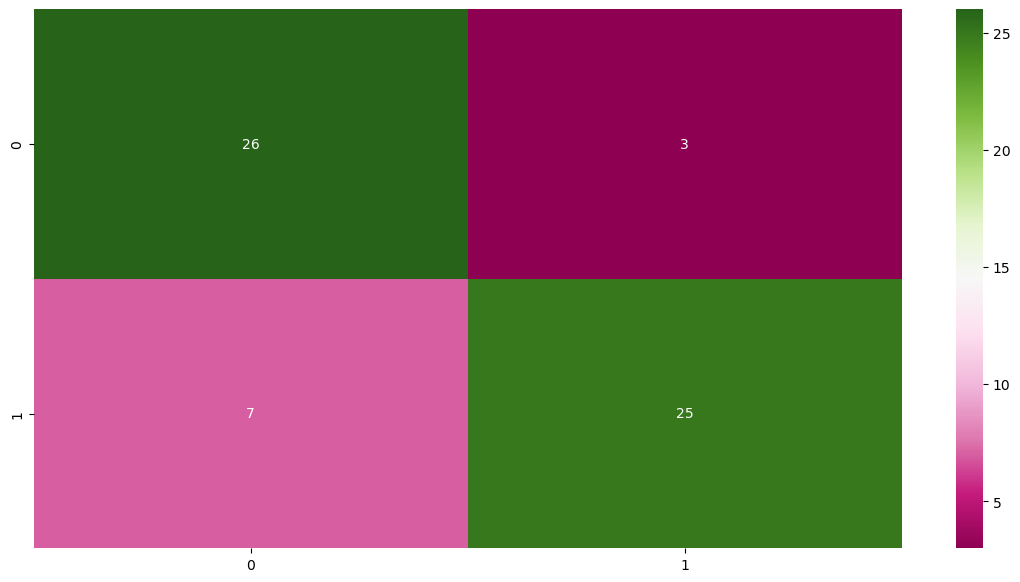

In [33]:
## Plot the Confusion Matrix

plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='PiYG')
plt.show()

*The confusion matrix can be used to calculate other performance metrics, such as precision, recall, and F1 score. These metrics can provide more detailed information about the model's performance.
The confusion matrix can also be used to identify specific areas where the model needs improvement. For example, if the model is making a lot of false positives for a particular class, this suggests that the model needs to be better at distinguishing between that class and other classes.*